In [10]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [11]:
# Load the data from Covidtracking
us_df = pd.read_csv('https://covidtracking.com/api/us/daily.csv', index_col=0)

In [12]:
us_df.head(5)

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200408,56,423164,1766602,17228,40298.0,47159.0,9702.0,1013.0,4073.0,216.0,...,14495,47159.0,2206994,2189766,2189766,1874.0,1579.0,104734.0,30570.0,135304.0
20200407,56,392594,1661868,16557,39011.0,45580.0,9649.0,889.0,4007.0,233.0,...,12621,45580.0,2071019,2054462,2054462,1941.0,730.0,114842.0,31263.0,146105.0
20200406,56,361331,1547026,17292,30237.0,44850.0,6607.0,816.0,2921.0,187.0,...,10680,44850.0,1925649,1908357,1908357,1182.0,3788.0,117302.0,29023.0,146325.0
20200405,56,332308,1429724,17307,27061.0,41062.0,5497.0,762.0,612.0,193.0,...,9498,41062.0,1779339,1762032,1762032,1184.0,2851.0,111132.0,26553.0,137685.0
20200404,56,305755,1318592,15573,26158.0,38211.0,5207.0,587.0,656.0,193.0,...,8314,38211.0,1639920,1624347,1624347,1352.0,4071.0,193718.0,33767.0,227485.0


In [13]:
us_df = us_df.reset_index()
us_df.date = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df.set_index('date').sort_index()
us_df = us_df.reset_index()
us_df = us_df[['date','positive', 'negative', 'pending', 'death', 'total']]

In [14]:
us_df.tail(5)

,date,positive,negative,pending,death,total
31,2020-04-04,305755,1318592,15573,8314,1639920
32,2020-04-05,332308,1429724,17307,9498,1779339
33,2020-04-06,361331,1547026,17292,10680,1925649
34,2020-04-07,392594,1661868,16557,12621,2071019
35,2020-04-08,423164,1766602,17228,14495,2206994


In [15]:
us_df['date'].dtypes

dtype('<M8[ns]')

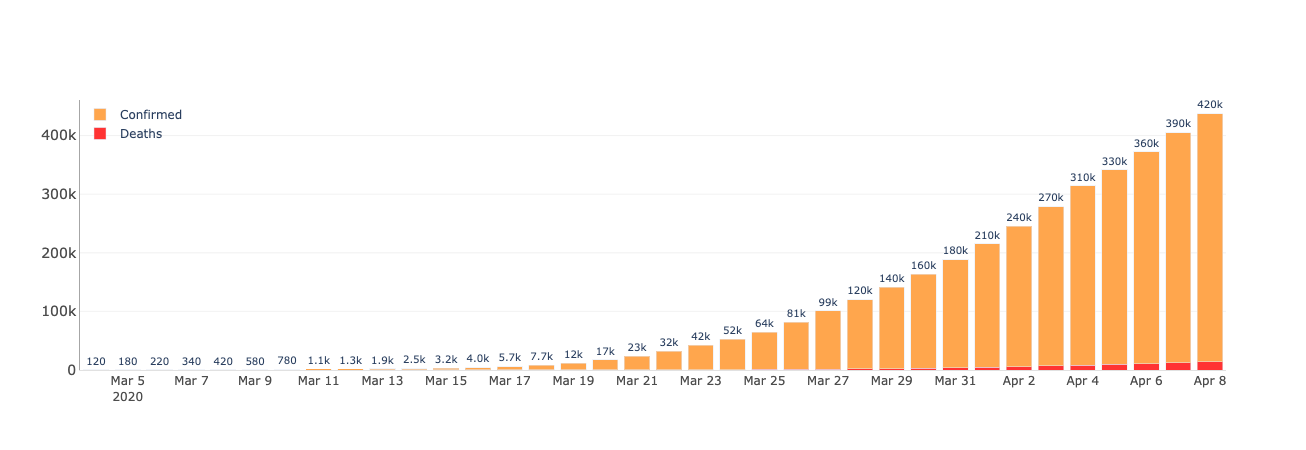

In [16]:
import plotly.graph_objects as go

con = us_df['positive']
dea = us_df['death']

fig = go.Figure()

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['death'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333'     
                    )
             )

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['positive'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d'
                    )
             )

fig.update_layout(barmode='stack',
                 paper_bgcolor='rgba(0,0,0,0)', 
                 plot_bgcolor='rgba(0,0,0,0)',
                 uniformtext_minsize=6, uniformtext_mode='hide',
                 hovermode='x', #sets the bar chart to display both tooltips by default
                 legend=dict(x=0, y=1),
                 #font=dict(size = 12),
                 dragmode=False, #disable panning and receive pinch to zoom events on mobile
                 yaxis = dict(
                      scaleanchor = "x",
                      scaleratio = 1,
                              ),
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='#a6a6a6', color='#4d4d4d',
                #showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                fixedrange=True,
                #tickfont = dict(size = 10),
                tickmode='auto',
                nticks=26
                )
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                 fixedrange=True,
                 tickfont = dict(size = 14),
                )


fig.update_traces(texttemplate='%{y:,.2s}', textposition='outside')


fig.show(displayModeBar=False)


import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)